In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('Football_data_merged_cleaned.csv')
df.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
0,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2320457_124732,2320457.0,2013-08-04,John Anthony Brooks,DFB,0.0,0.0,0.0,0.0,120.0,2013.0,First Round,2.0,3.0,0.0,0.0,Ervin Lamce,Jos Luhukay,Grummi Arena,5446.0,Benjamin Cortus,Borussia Dortmund,Hertha BSC,02:03:00,domestic_cup,Unknown,0.0,Unknown
1,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321034_124732,2321034.0,2013-08-10,John Anthony Brooks,L1,0.0,0.0,1.0,0.0,90.0,2013.0,1. Matchday,6.0,1.0,1.0,18.0,Jos Luhukay,Armin Veh,Olympiastadion Berlin,54376.0,Michael Weiner,Hertha BSC,eintracht frankfurt Football ag,06:01:00,domestic_league,Unknown,32.0,Goals
2,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321049_124732,2321049.0,2013-08-18,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,8.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
3,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2321049_49723,2321049.0,2013-08-18,Timothy Chandler,L1,1.0,0.0,0.0,0.0,33.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
4,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321061_124732,2321061.0,2013-08-24,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,23.0,2013.0,3. Matchday,1.0,0.0,5.0,16.0,Jos Luhukay,Thorsten Fink,Olympiastadion Berlin,63574.0,Marco Fritz,Hertha BSC,Hamburger SV,01:00:00,domestic_league,Unknown,23.0,Substitutions


In [3]:
df['away_club_name'].value_counts()

Borussia Dortmund                            1066
FC Schalke 04                                 113
eintracht frankfurt Football ag               107
Stoke City                                    105
Borussia Verein fur Leibesubung 1900 e.V.     104
                                             ... 
Real Sociedad De futbol S.A.D                   1
Boavista Futebol Clube                          1
Sporting Clube de Portugal                      1
Beerschot AC                                    1
Angers SCO                                      1
Name: away_club_name, Length: 255, dtype: int64

In [4]:
df['home_club_name'].value_counts()

Borussia Dortmund                            1122
FC Schalke 04                                 111
Borussia Verein für Leibesübung 1900 e.V.     108
Eintracht Frankfurt Fuayball AG               101
Stoke City                                     98
                                             ... 
Livingston Football Club                        1
Catania FC                                      1
sonderjyske fc                                  1
Go Ahead Eagles                                 1
Dnipro Dnipropetrovsk (-2020)                   1
Name: home_club_name, Length: 253, dtype: int64

In [5]:
# df['season'] = df['season'].astype('int32')

In [6]:
df['goals'].value_counts()

0.0    4231
1.0     371
2.0      63
3.0      16
4.0       5
Name: goals, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    4686 non-null   float64
 1   name                         4686 non-null   object 
 2   last_season                  4686 non-null   float64
 3   current_club_id              4686 non-null   float64
 4   player_code                  4686 non-null   object 
 5   country_of_birth             4686 non-null   object 
 6   date_of_birth                4686 non-null   object 
 7   sub_position                 4686 non-null   object 
 8   position                     4686 non-null   object 
 9   foot                         4686 non-null   object 
 10  height_in_cm                 4686 non-null   float64
 11  market_value_in_eur          4686 non-null   float64
 12  highest_market_value_in_eur  4686 non-null   float64
 13  contract_expiratio

# Descriptive Analysis

### Which club shows the biggest seasonal improvement in home performances?

In [10]:
# For this, we will see 3 clubs and compare their performance in home and away clubs matches 
# and see how they are performing over time with respect to goals hit

df_home = df[(df['home_club_name'].isin(['Borussia Dortmund','FC Schalke 04','Borussia Verein für Leibesübung 1900 e.V.']))]

df_home.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
0,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2320457_124732,2320457.0,2013-08-04,John Anthony Brooks,DFB,0.0,0.0,0.0,0.0,120.0,2013.0,First Round,2.0,3.0,0.0,0.0,Ervin Lamce,Jos Luhukay,Grummi Arena,5446.0,Benjamin Cortus,Borussia Dortmund,Hertha BSC,02:03:00,domestic_cup,Unknown,0.000000,Unknown
11,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321281_124732,2321281.0,2014-03-22,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2013.0,26. Matchday,3.0,0.0,5.0,9.0,Lucien Favre,Jos Luhukay,Stadion im Borussia-Park,53050.0,Peter Gagelmann,Borussia Verein für Leibesübung 1900 e.V.,Hertha BSC,03:00:00,domestic_league,Unknown,37.000000,Unknown
24,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2460690_124732,2460690.0,2014-10-18,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,20.0,2014.0,8. Matchday,2.0,0.0,9.0,13.0,Roberto Di Matteo,Jos Luhukay,Veltins-Arena,61973.0,Knut Kircher,FC Schalke 04,Hertha BSC,02:00:00,domestic_league,Unknown,44.333333,Unknown
31,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2460745_124732,2460745.0,2014-12-06,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2014.0,14. Matchday,3.0,2.0,6.0,15.0,Lucien Favre,Jos Luhukay,Stadion im Borussia-Park,50190.0,Marco Fritz,Borussia Verein für Leibesübung 1900 e.V.,Hertha BSC,03:02:00,domestic_league,Unknown,28.000000,Unknown
32,31041.0,Fabian Johnson,2019.0,18.0,fabian-johnson,Germany,1987-12-11,Left Winger,Attack,right,183.0,2000000.0,7000000.0,Unknown,Robert Schneider,2460745_31041,2460745.0,2014-12-06,Fabian Johnson,L1,0.0,0.0,0.0,0.0,6.0,2014.0,14. Matchday,3.0,2.0,6.0,15.0,Lucien Favre,Jos Luhukay,Stadion im Borussia-Park,50190.0,Marco Fritz,Borussia Verein für Leibesübung 1900 e.V.,Hertha BSC,03:02:00,domestic_league,Unknown,25.666667,Unknown


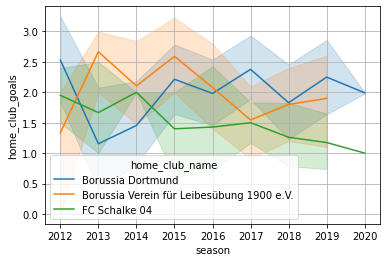

In [11]:
sns.lineplot(x = df_home['season'],y = df_home['home_club_goals'],hue = df_home['home_club_name'])
plt.grid('True')
plt.show()

### Interpretation => Borussia Verein shows the highest number of goals scored across 2013 and 2015, and then it saw a decrease in goals scored from 2015 to 2017, and after 2017 it again saw a rise in number of goals

### FC Schalke 04 has been the worst performer across different years, whereas Borussia Dortmund saw their bad season from 2012 to 2013, but after that it showed a gradual increase in the number of goals scored by the club

# Hypothesis Testing

### Question => Can we say that the average attendance, when recorded for 2 competition types -: domestic league vs domestic cup is different?

In [15]:
# Hypothesis =>
# Null Hypothesis => Attendance has no significant difference when seen for league v/s cup matches
# Alternate Hypothesis => Attendance has a significant difference when seen for league v/s cup matches

In [16]:
# We will consider confidence interval as 95%, so significance level is going to be 5%(alpha = 0.05)

In [17]:
attendance_league = df[df['competition_type'] == 'domestic_league']['attendance'].dropna()
attendance_cup = df[df['competition_type'] == 'domestic_cup']['attendance'].dropna()

In [18]:
# Sample statistics

import statistics as st

x1 = st.mean(attendance_league)
x2 = st.mean(attendance_cup)

v1 = st.stdev(attendance_league) ** 2
v2 = st.stdev(attendance_cup) ** 2

n1 = len(attendance_league)
n2 = len(attendance_cup)

df = n1 + n2 - 2

In [19]:
# Metrics

from scipy.stats import t
import math 

signal = abs(x1 - x2)
noise = math.sqrt(v1*(n1 - 1) + v2*(n2 - 1)) * math.sqrt(1/n1 + 1/n2)

t_stats = signal / noise 
print("T-stats:",t_stats)

p_value = t.sf(abs(t_stats),df)*2
print("P-value:",p_value)

t_critical = t.ppf(1 - 0.025,df)
print("T-critical:",t_critical)

T-stats: 0.02635712819505973
P-value: 0.9789736823689101
T-critical: 1.9605024260694306


# Statistical conclusion
## P-value(0.97) > alpha(0.05), so we can say that we will not reject the null hypothesis

# Business Decision
## So, we can say that the attendance will not be impacted significantly, when viewed in terms of domestic league matches and domestic cup matches

# Attendance and Stadium Analysis

## Descriptive Analysis

### Are certain stadiums consistently associated with higher attendance figures?

In [42]:
df1 = df.copy()

In [44]:
df1['stadium'].value_counts()

SIGNAL IDUNA PARK                994
Veltins-Arena                    111
Stadion im Borussia-Park         108
Commerzbank Arena                 99
bet365 Stadium                    98
                                ... 
City Arina                         1
Konya Buyuksehir Arena             1
Estadio Municipal de Braga         1
Nacionalna Arena Tose Proeski      1
Grummi Arena                       1
Name: stadium, Length: 358, dtype: int64

In [46]:
df2 = df1[df1['stadium'].isin(['SIGNAL IDUNA PARK','Veltins-Arena','Stadion im Borussia-Park'])]

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 11 to 4685
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    1213 non-null   float64
 1   name                         1213 non-null   object 
 2   last_season                  1213 non-null   float64
 3   current_club_id              1213 non-null   float64
 4   player_code                  1213 non-null   object 
 5   country_of_birth             1213 non-null   object 
 6   date_of_birth                1213 non-null   object 
 7   sub_position                 1213 non-null   object 
 8   position                     1213 non-null   object 
 9   foot                         1213 non-null   object 
 10  height_in_cm                 1213 non-null   float64
 11  market_value_in_eur          1213 non-null   float64
 12  highest_market_value_in_eur  1213 non-null   float64
 13  contract_expirati

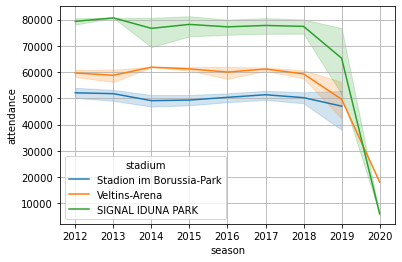

In [50]:
sns.lineplot(x = df2['season'],y = df2['attendance'],hue = df2['stadium'])
plt.grid('True')
plt.show()

## Interpretation => 
### Looking at the graphs, we can say that 'Veltins-Arena' and 'SIGNAL IDUNA PARK' had started with a strong attendance numbers back in 2012. They have maintained these strong attendance numbers till 2018. After that, we can see a big fall for these stadiums in terms of attendance.

### Whereas, we can say that for 'Stadion im Borussia-Park', it has maintained a steady attendance of around 50000 from 2012 to 2019.

# K Nearest Neighbors Classification

### We want to judge a player's dominant foot(left or right) based on various input factors

In [106]:
df3 = df2.copy()

df3['foot_enc'] = scaler.fit_transform(df3['foot'])

df3.corr()[['foot_enc']].sort_values(by = 'foot_enc',ascending = False)

,foot_enc
foot_enc,1.000000
last_season,0.698108
season,0.542288
market_value_in_eur,0.484658
player_id,0.434110
highest_market_value_in_eur,0.379373
game_id,0.373717
minutes_played,0.088555
away_club_position,0.079480
home_club_goals,0.075648


In [100]:
df2.head(15)

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
11,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321281_124732,2321281.0,2014-03-22,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2013.0,26. Matchday,3.0,0.0,5.000000,9.000000,Lucien Favre,Jos Luhukay,Stadion im Borussia-Park,53050.0,Peter Gagelmann,Borussia Verein für Leibesübung 1900 e.V.,Hertha BSC,03:00:00,domestic_league,Unknown,37.000000,Unknown
24,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2460690_124732,2460690.0,2014-10-18,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,20.0,2014.0,8. Matchday,2.0,0.0,9.000000,13.000000,Roberto Di Matteo,Jos Luhukay,Veltins-Arena,61973.0,Knut Kircher,FC Schalke 04,Hertha BSC,02:00:00,domestic_league,Unknown,44.333333,Unknown
31,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2460745_124732,2460745.0,2014-12-06,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2014.0,14. Matchday,3.0,2.0,6.000000,15.000000,Lucien Favre,Jos Luhukay,Stadion im Borussia-Park,50190.0,Marco Fritz,Borussia Verein für Leibesübung 1900 e.V.,Hertha BSC,03:02:00,domestic_league,Unknown,28.000000,Unknown
32,31041.0,Fabian Johnson,2019.0,18.0,fabian-johnson,Germany,1987-12-11,Left Winger,Attack,right,183.0,2000000.0,7000000.0,Unknown,Robert Schneider,2460745_31041,2460745.0,2014-12-06,Fabian Johnson,L1,0.0,0.0,0.0,0.0,6.0,2014.0,14. Matchday,3.0,2.0,6.000000,15.000000,Lucien Favre,Jos Luhukay,Stadion im Borussia-Park,50190.0,Marco Fritz,Borussia Verein für Leibesübung 1900 e.V.,Hertha BSC,03:02:00,domestic_league,Unknown,25.666667,Unknown
52,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2460906_124732,2460906.0,2015-05-09,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,55.0,2014.0,32. Matchday,2.0,0.0,7.000000,13.000000,Jurgen Klopp,Pa Dardai,SIGNAL IDUNA PARK,80667.0,Tobias Stieler,Borussia Dortmund,Hertha BSC,02:00:00,domestic_league,Unknown,55.000000,Substitutions
59,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2581184_124732,2581184.0,2015-08-30,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2015.0,3. Matchday,3.0,1.0,1.000000,10.000000,Thomas Tuchel,Pa Dardai,SIGNAL IDUNA PARK,80500.0,Guido Winkmann,Borussia Dortmund,Hertha BSC,03:01:00,domestic_league,Unknown,76.666667,Unknown
60,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2581675_124732,2581675.0,2015-10-17,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,1.0,2015.0,9. Matchday,2.0,1.0,3.000000,5.000000,Andre Breitenreiter,Pa Dardai,Veltins-Arena,61336.0,Marco Fritz,FC Schalke 04,Hertha BSC,02:01:00,domestic_league,Unknown,73.333333,Unknown
91,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2704269_124732,2704269.0,2016-10-14,John Anthony Brooks,L1,1.0,0.0,0.0,0.0,90.0,2016.0,7. Matchday,1.0,1.0,5.000000,4.000000,Thomas Tuchel,Pa Dardai,SIGNAL IDUNA PARK,80800.0,Patrick I

In [57]:
df2['foot'].value_counts()

right    1165
both       31
left       17
Name: foot, dtype: int64

In [211]:
# Making x and y
from sklearn import preprocessing
scaler = preprocessing.LabelEncoder()

#x = df2[['height_in_cm','minutes_played','goals']]
x = df2[['last_season','yellow_cards','attendance']]
y = scaler.fit_transform(df2['foot'])

In [213]:
print(scaler.classes_)

['both' 'left' 'right']


In [215]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 236)

In [217]:
ytest

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Text(0, 0.5, 'Error rate')

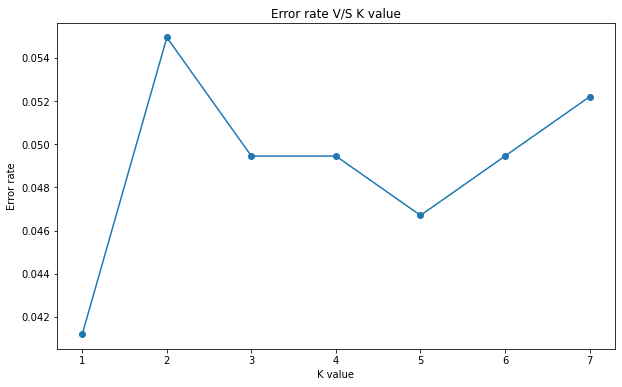

In [219]:
# Optimal K-value

from sklearn import neighbors
import matplotlib.pyplot as plt

error_rate = []

for i in range(1,8):
    df2_knn = neighbors.KNeighborsClassifier(n_neighbors = i) # Model creation
    df2_knn.fit(xtrain,ytrain) # Model training
    pred_i = df2_knn.predict(xtest) # Model prediction
    error_rate.append(np.mean(pred_i != ytest)) # error rate calculation
    
plt.figure(figsize = (10,6))
plt.plot(range(1,8),error_rate,marker = 'o')
plt.title("Error rate V/S K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [1]:
# Going for k = 1

In [221]:
k = 1
knn_5 = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn_5.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [223]:
print(knn_5.classes_)
print(knn_5.n_neighbors)

[0 1 2]
1


In [225]:
df2.iloc[245]

player_id                                  58500.0
name                               Alfredo Morales
last_season                                 2019.0
current_club_id                               38.0
player_code                        alfredo-morales
country_of_birth                           Germany
date_of_birth                           1990-05-12
sub_position                      Central Midfield
position                                  Midfield
foot                                         right
height_in_cm                                 183.0
market_value_in_eur                       800000.0
highest_market_value_in_eur              3500000.0
contract_expiration_date       2023-12-31 00:00:00
agent_name                               Wasserman
appearance_id                        3203529_58500
game_id                                  3203529.0
date                                    2019-11-09
player_name                        Alfredo Morales
competition_id                 

In [227]:
y_test_point = np.array(['2019.0','1.0','61831.0']).reshape(1,-1)
pred = knn_5.predict(y_test_point)
pred

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = 

array([2])

### As seen from the above interpretation, we can see that the player belongs to 'right' foot category, and the model rightfully predicted the person to be 'right' footed category person
### These results have also been tested on other instances also

In [230]:
predictions2 = knn_5.predict(xtrain)
print("Training accuracy to see model is either overfit or not:",accuracy_score(predictions2,ytrain))

Training accuracy to see model is either overfit or not: 0.9988221436984688


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [232]:
predictions = knn_5.predict(xtest)
predictions

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

In [234]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print("Accuracy:",accuracy_score(predictions,ytest))
print("Recall:",recall_score(predictions,ytest,average = 'micro'))
print("F1-score:",f1_score(predictions,ytest,average = 'micro'))
print("Precision:",precision_score(predictions,ytest,average = 'micro'))

Accuracy: 0.9917582417582418
Recall: 0.9917582417582418
F1-score: 0.9917582417582418
Precision: 0.9917582417582418


In [236]:
# ROC Score

from sklearn.metrics import roc_auc_score

y_pred_probab = knn_5.predict_proba(xtest)

roc_score = roc_auc_score(ytest,y_pred_probab,multi_class = 'ovr', average = 'macro')

roc_score

0.9734833885127901

## Interpretation =>
### Looking at all the scores, the model has a very good accuracy of 99.1% which is near to excellent. A good recall score suggests that the model is able to identify correct true positives(indicated by recall) and making accurate positive predictions(indicated by precision). This shows that the model is not over-fitting nor under-fitting on the classes

### ROC value of 0.97 indicates that the model is very effectively identifying the data points to be of what category

## Another verification has been done in order to check if the model is overfit or not,as the accuracy is very high. The model is able to predict the training classes with 99.8% of accuracy, while for the test data, we are able to see that the model is showing an accuracy of 97.8%. So, we can say that as the accuracies of both training and testing data is approximately equal, the model is not overfitted

## Overall, we can say that this model is very effective in telling whether the player is 'right' footed, 'left' footed, or 'both' footed, by considering various features

# Event Analysis(Descriptive Analysis is done in Tableau)

# Hypothesis Testing

## Are teams playing in high-attendance matches receive significantly more or less referee decisions (yellow cards and red cards) compared to low-attendance matches

### Null Hypothesis (H0) => Teams playing in high-attendance matches did not recieved significantly different referee decisions as compared to low-attendance matches
### Alternate Hypothesis(H1) => Teams playing in high-attendance matches recieved significantly different referee decisions as compared to low-attendance matches 

In [ ]:
mean_attendance = df['attendance'].mean()
df['attendance_classification'] = np.where(df['attendance'] > mean_attendance,"High_Attendance","Low_Attendance")

In [ ]:
high_attendance_cards = df[df['attendance_classification'] == "High_Attendance"][['yellow_cards','red_cards']].sum(axis = 1)
low_attendance_cards = df[df['attendance_classification'] == "Low_Attendance"][['yellow_cards','red_cards']].sum(axis = 1)

In [ ]:
# Since we do not have the population standard deviation, so we will be using the 2 sample independent T-test
# We will consider the significance level to be 5%, so alpha's value is going to 0.05

In [ ]:
import statistics as st

x1 = st.mean(high_attendance_cards)
x2 = st.mean(low_attendance_cards)

v1 = st.stdev(high_attendance_cards) ** 2
v2 = st.stdev(low_attendance_cards) ** 2

n1 = len(high_attendance_cards)
n2 = len(low_attendance_cards)

df = n1 + n2 - 2

In [ ]:
from scipy.stats import t
import math

signal = abs(x1 - x2) 
noise = math.sqrt(v1*(n1 - 1) + v2*(n2 - 1)) * math.sqrt(1/n1 + 1/n2)

t_stats = signal / noise 
print("T-stats value is:",t_stats)

p_value = t.sf(abs(t_stats),df) * 2
print("P-value is:",p_value)

t_critical = t.ppf(1 - 0.0025,df)
print("T-critical value is:",t_critical)

# Statistical conclusion
## The p-value (0.94) > alpha (0.05), so we will not reject the null hypothesis.
## T-stats value (0.07) is not greater than +T-critical(2.80), so we will not reject the null hypothesis

# Business Conclusion => 
## So, we can say that the teams when playing in stadiums with high-attendance did not recieved a different number of yellow and red cards, as compared to the stadiums with low-attendance 